<a href="https://colab.research.google.com/github/Vishal-3600/Leader/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [13]:
data = pd.read_csv('/content/data_for_lr.csv')

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [14]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

Iteration = 1, Loss = 6300.813890106202
Iteration = 1, Loss = 766.2258286256562
Iteration = 1, Loss = 99.24773303649734
Iteration = 1, Loss = 18.869610901991745
Iteration = 2, Loss = 9.18316933958223
Iteration = 3, Loss = 8.015844600241559
Iteration = 4, Loss = 7.875166149081837
Iteration = 5, Loss = 7.858209748608635
Iteration = 6, Loss = 7.856163201982616
Iteration = 7, Loss = 7.855913455318029
Iteration = 8, Loss = 7.8558802429166334
Iteration = 9, Loss = 7.855873125564268
Iteration = 10, Loss = 7.855869153263103
Iteration = 11, Loss = 7.855865560288615
Iteration = 12, Loss = 7.855862013340871
Iteration = 13, Loss = 7.855858472253564
Iteration = 14, Loss = 7.855854932186187
Iteration = 15, Loss = 7.855851392555379
Iteration = 16, Loss = 7.855847853290804
Iteration = 17, Loss = 7.855844314383953
Iteration = 18, Loss = 7.855840775833772
Iteration = 19, Loss = 7.855837237640097
Iteration = 20, Loss = 7.8558336998028855
Iteration = 21, Loss = 7.85583016232209
Iteration = 22, Loss = 7.85

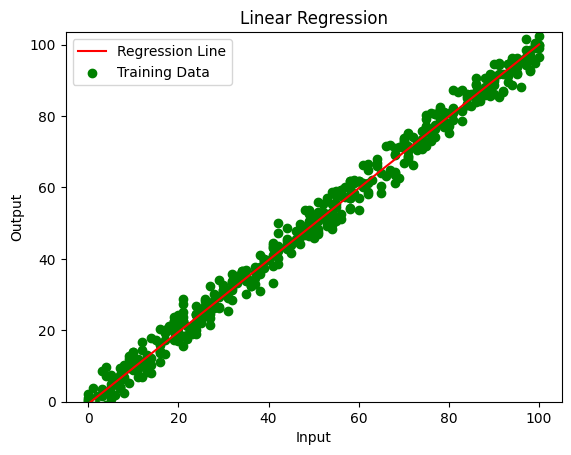

In [16]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 200)